In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Standard library packages
import io

# Import Seaborn for graphics and plotting
import seaborn as sns

# Import bioservices module, to run remote UniProt queries
from bioservices import UniProt

# Reading Data from txt file

In [2]:
FielName= "PathLinker_2018_human-ppi-weighted-cap0_75.txt"
pathLinker_file = open ( FielName , 'r' )
# print(pathLinker_file)
print(pathLinker_file.readable())

True


In [3]:
header_line = pathLinker_file.readline()
data_lines = pathLinker_file.readlines()

In [4]:
header_line

'#tail\thead\tedge_weight\tedge_type\n'

In [5]:
header_line.rstrip().split('\t')[0:3]

['#tail', 'head', 'edge_weight']

In [6]:
# data_lines

In [7]:
type(data_lines)

list

In [8]:
len(data_lines)

612516

# Converting txt file to dataframe

In [9]:
weighed_edges_list=[]
for line in data_lines:
    elements=line.split('\t')
    tail,head = elements[0:2]
    edge_weight = eval(elements[2])
#     DG.add_weighted_edges_from((tail,head, edge_weight))
    weighed_edges_list.append((tail , head , edge_weight))
# weighed_edges_list

In [10]:
len(weighed_edges_list)

612516

In [11]:
# create DataFrame using data
weighted_edges_df = pd.DataFrame(weighed_edges_list, columns =['Tail', 'Head', 'Edge_weight'])
weighted_edges_df

,Tail,Head,Edge_weight
0,Q8TBF5,Q9UKB1,0.311133
1,Q8TBF4,Q15717,0.311133
2,Q8TBF4,P08865,0.311133
3,Q8TBF4,Q02539,0.311133
4,Q8TBF4,Q96J01,0.201461
...,...,...,...
612511,Q17RB8,Q969G2,0.608042
612512,Q17RB8,Q06710,0.181552
612513,Q17RB8,P15374,0.280419
612514,Q17RB8,Q5JST6,0.608042


In [12]:
unique_tails = weighted_edges_df.Tail.unique()

In [13]:
unique_heads = weighted_edges_df.Head.unique()

In [14]:
print(unique_tails)
print(len(unique_tails))
print(unique_heads)
print(len(unique_heads))

['Q8TBF5' 'Q8TBF4' 'Q5MIZ7' ... 'Q7Z739' 'Q17RB8' 'Q3LFD5']
17082
['Q9UKB1' 'Q15717' 'P08865' ... 'Q008S8' 'Q8N4T0' 'Q8IXL9']
17095


# Graph

## Construct a graph (biological network)

In [15]:
DG = nx.DiGraph()

In [16]:
DG.add_weighted_edges_from(weighed_edges_list)

In [17]:
# weight_labels = nx.get_edge_attributes(DG,'weight')
# weight_labels

In [18]:
# weight_labels

In [19]:
# len(weight_labels)

## List the acyclic shortest path(s) between two proteins in a text file.
* Provide the total path score.
* Provide the weight of each interaction in the path(s).
* If more than one path, report all the paths.
* Draw the sub-network formed by these shortest paths.

In [20]:
# shortest_path = ([p for p in nx.shortest_path(DG, source="P20933", target="Q15303", weight='weight')])
# shortest_path

In [21]:
weighted_shortest_paths= ([p for p in nx.all_shortest_paths(DG, source="P20933", target="Q15303", weight='weight')])
weighted_shortest_paths

[['P20933', 'Q9Y3A3', 'Q68CZ1', 'P04637', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q6ZU80', 'P04637', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'O15259', 'P22681', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q6ZU80', 'P22681', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q96ST8', 'P46108', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q6ZU80', 'P46108', 'Q15303']]

In [22]:
total_path_score = nx.shortest_path_length(DG,source="P20933", target="Q15303", weight='weight')
total_path_score

0.6889442

In [23]:
nx.path_weight(DG,('P20933', 'Q9Y3A3') , weight ='weight')

0.311133

In [24]:
sub_network = nx.DiGraph()
all_paths_edges = []
for shortest_path in weighted_shortest_paths :
    paths_edges = [tuple([shortest_path[i],shortest_path[i+1],nx.path_weight(DG,([shortest_path[i],shortest_path[i+1]]), weight ='weight')]) for i in range(len(shortest_path)-1)]
    print(paths_edges)
#   add path edges to the new sub network
    sub_network.add_weighted_edges_from(paths_edges)
    all_paths_edges.append(paths_edges)
    print("*"*10)

[('P20933', 'Q9Y3A3', 0.311133), ('Q9Y3A3', 'Q68CZ1', 0.0333391), ('Q68CZ1', 'P04637', 0.0333391), ('P04637', 'Q15303', 0.311133)]
**********
[('P20933', 'Q9Y3A3', 0.311133), ('Q9Y3A3', 'Q6ZU80', 0.0333391), ('Q6ZU80', 'P04637', 0.0333391), ('P04637', 'Q15303', 0.311133)]
**********
[('P20933', 'Q9Y3A3', 0.311133), ('Q9Y3A3', 'O15259', 0.0333391), ('O15259', 'P22681', 0.0333391), ('P22681', 'Q15303', 0.311133)]
**********
[('P20933', 'Q9Y3A3', 0.311133), ('Q9Y3A3', 'Q6ZU80', 0.0333391), ('Q6ZU80', 'P22681', 0.0333391), ('P22681', 'Q15303', 0.311133)]
**********
[('P20933', 'Q9Y3A3', 0.311133), ('Q9Y3A3', 'Q96ST8', 0.0333391), ('Q96ST8', 'P46108', 0.0333391), ('P46108', 'Q15303', 0.311133)]
**********
[('P20933', 'Q9Y3A3', 0.311133), ('Q9Y3A3', 'Q6ZU80', 0.0333391), ('Q6ZU80', 'P46108', 0.0333391), ('P46108', 'Q15303', 0.311133)]
**********


In [25]:
all_paths_edges

[[('P20933', 'Q9Y3A3', 0.311133),
  ('Q9Y3A3', 'Q68CZ1', 0.0333391),
  ('Q68CZ1', 'P04637', 0.0333391),
  ('P04637', 'Q15303', 0.311133)],
 [('P20933', 'Q9Y3A3', 0.311133),
  ('Q9Y3A3', 'Q6ZU80', 0.0333391),
  ('Q6ZU80', 'P04637', 0.0333391),
  ('P04637', 'Q15303', 0.311133)],
 [('P20933', 'Q9Y3A3', 0.311133),
  ('Q9Y3A3', 'O15259', 0.0333391),
  ('O15259', 'P22681', 0.0333391),
  ('P22681', 'Q15303', 0.311133)],
 [('P20933', 'Q9Y3A3', 0.311133),
  ('Q9Y3A3', 'Q6ZU80', 0.0333391),
  ('Q6ZU80', 'P22681', 0.0333391),
  ('P22681', 'Q15303', 0.311133)],
 [('P20933', 'Q9Y3A3', 0.311133),
  ('Q9Y3A3', 'Q96ST8', 0.0333391),
  ('Q96ST8', 'P46108', 0.0333391),
  ('P46108', 'Q15303', 0.311133)],
 [('P20933', 'Q9Y3A3', 0.311133),
  ('Q9Y3A3', 'Q6ZU80', 0.0333391),
  ('Q6ZU80', 'P46108', 0.0333391),
  ('P46108', 'Q15303', 0.311133)]]

In [26]:
pos = nx.spring_layout(sub_network)
sub_weight_labels = nx.get_edge_attributes(sub_network,'weight')

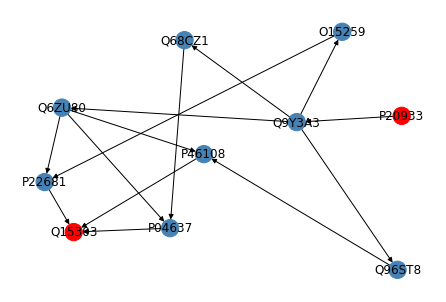

In [27]:
two_nodes = ['P20933', 'Q15303']
# nodecol = ['red' for node in two_nodes]
nodecol = ['steelblue' if not node in two_nodes else 'red' for node in sub_network.nodes()]
nx.draw(sub_network,pos, with_labels = True, node_color = nodecol)

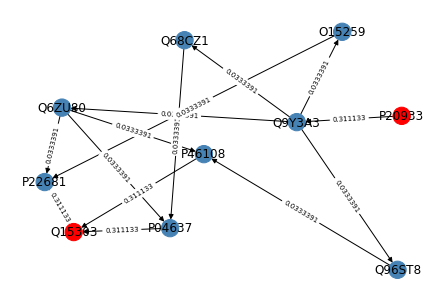

In [50]:
nx.draw(sub_network,pos, with_labels = True, node_color = nodecol)
nx.draw_networkx_edge_labels(sub_network,pos,font_size=7,edge_labels=sub_weight_labels);

In [54]:
weighted_shortest_paths

[['P20933', 'Q9Y3A3', 'Q68CZ1', 'P04637', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q6ZU80', 'P04637', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'O15259', 'P22681', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q6ZU80', 'P22681', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q96ST8', 'P46108', 'Q15303'],
 ['P20933', 'Q9Y3A3', 'Q6ZU80', 'P46108', 'Q15303']]

In [53]:
shortest_paths_number = len(weighted_shortest_paths)
source = "P20933"
target = "Q15303"
first_line = f"Shortest paths between {source} and {target} Proteins\n\nNumber of shortest paths :{shortest_paths_number}"

shortest_path_file = open ("Acyclic_shortest_path.txt",'w')
shortest_path_file.write(first_line)
shortest_path_file.write("\nTotal path score : %f \n\n" %(total_path_score))

for idx ,shortest_path in enumerate(weighted_shortest_paths):
    shortest_path_file.write(f"Path {idx} : \n")
    nodes_joined = " > ".join(shortest_path)
    
    shortest_path_file.write(f"{nodes_joined} ")
    shortest_path_file.write("\n\n\tTail\tHead\tEdge_weight\n")

    for edges in all_paths_edges[idx]:
#         print(f"\t{edges[0]}\t{edges[1]}\t{edges[2]}\n")
        shortest_path_file.write(f"\t{edges[0]}\t{edges[1]}\t{edges[2]}\n")

#         print()
    shortest_path_file.write("\n")
shortest_path_file.close()

## Given one protein, list all the directly connected proteins to it in a text file.
* Report the degree (number of connections) of this protein in a separate line.
* Provide each connected protein in a line with its corresponding interaction weight.

In [30]:
req_protein = "Q5MIZ7"

In [31]:
successors = [n for n in DG.successors(req_protein)]
print(successors)
print(len(successors))
DG.out_degree(req_protein)

['Q8N490', 'Q53ET0', 'P51648', 'P04629', 'P46379', 'P16104', 'Q99689', 'P62714', 'Q9H3S7', 'Q16719', 'Q86VU5', 'Q96LJ8', 'Q07866', 'P27348', 'Q9NR45', 'P07384', 'P30084', 'O75439', 'Q9H0B6', 'P33176', 'P62829', 'P35557', 'O60610', 'Q53H82', 'O14745', 'Q00839', 'Q13263', 'Q96KP4', 'Q9NY27', 'P60510', 'P21980', 'Q9BZF1', 'Q14103']
33


33

In [32]:
predecessors = [n for n in DG.predecessors(req_protein)]
print(predecessors)
print(len(predecessors))
print(DG.in_degree(req_protein))
in_degree = DG.in_degree(req_protein)

['P62829', 'Q99689', 'O14745', 'P27348', 'P30084', 'Q86VU5', 'Q14103', 'P04629', 'Q96LJ8', 'Q00839', 'P35557', 'P60510', 'Q13263', 'P07384', 'Q9H3S7', 'Q53H82', 'Q9BZF1', 'O75439', 'O60610', 'P62714', 'Q07866', 'P21980', 'Q9NR45', 'Q96KP4', 'P46379', 'P51648', 'Q9NY27', 'Q9H0B6', 'Q8N490', 'P33176', 'Q16719']
31
31


In [33]:
DG.degree(req_protein)

64

In [34]:
protein_predecessors_file = open (f"{req_protein}_predecessors.txt",'w')
protein_predecessors_file.write(f"{req_protein} In Degree = %d \n" %(in_degree))
protein_predecessors_file.write("\nTail\tHead\tEdge_weight\n")

for tail in predecessors:
    protein_predecessors_file.write(f"{tail}\t{req_protein}\t{nx.path_weight(DG,(tail,req_protein), weight ='weight')}\n")
    
protein_predecessors_file.close()

In [35]:
# weighted_edges_df[weighted_edges_df["Head"]==req_protein]

## Given a set of proteins:
* Draw a histogram for the proteins degree.
* Rank these proteins from the highly connected to the least in a text file, where each line is a protein and its corresponding degree.

In [36]:
proteins_set = ['P62829', 'Q99689', 'O14745', 'P27348', 'P30084', 'Q86VU5', 'Q14103']

In [37]:
#DG.nodes() 
in_degrees = [DG.in_degree(n) for n in proteins_set]
out_degrees = [DG.out_degree(n) for n in proteins_set]
degrees = [DG.degree(n) for n in proteins_set]



print(in_degrees)
print(len(in_degrees))
print(out_degrees)
print(len(out_degrees))

[216, 61, 91, 454, 92, 61, 326]
7
[216, 58, 87, 460, 92, 60, 323]
7


In [38]:
proteins_degrees = pd.DataFrame(list(zip(proteins_set, in_degrees, out_degrees, degrees)),columns =['Proteins', 'In_Degree' , 'Out_Degree',"Degrees"])
proteins_degrees

,Proteins,In_Degree,Out_Degree,Degrees
0,P62829,216,216,432
1,Q99689,61,58,119
2,O14745,91,87,178
3,P27348,454,460,914
4,P30084,92,92,184
5,Q86VU5,61,60,121
6,Q14103,326,323,649


In [39]:
sorted_degrees = proteins_degrees.sort_values(by=['Degrees'], ascending=False)
sorted_degrees

,Proteins,In_Degree,Out_Degree,Degrees
3,P27348,454,460,914
6,Q14103,326,323,649
0,P62829,216,216,432
4,P30084,92,92,184
2,O14745,91,87,178
5,Q86VU5,61,60,121
1,Q99689,61,58,119


In [40]:
len(sorted_degrees)

7

In [41]:
protein_degrees_file = open ("Proteins_degrees.txt",'w')
protein_degrees_file.write("Protein\tDegree\n\n")

for idx in sorted_degrees.index:
    protein_degrees_file.write(f"{sorted_degrees['Proteins'][idx]}\t{sorted_degrees['Degrees'][idx]}\n")

protein_degrees_file.close()

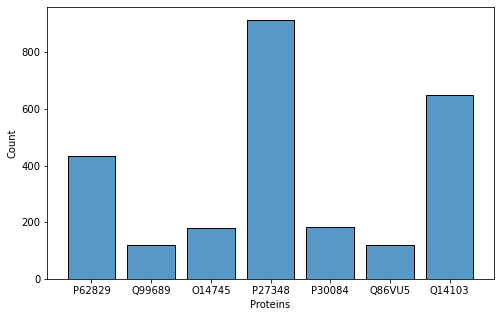

In [42]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(8, 5))

sns.histplot(data=proteins_degrees, x="Proteins" , weights=degrees , shrink=.8)
plt.show()

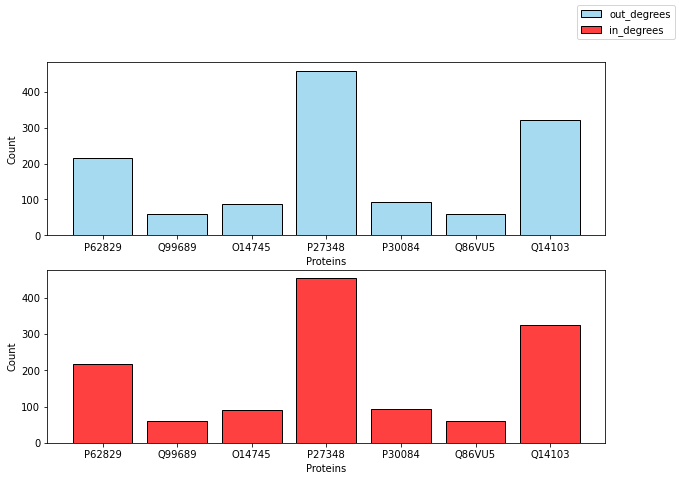

In [43]:
fig, axs = plt.subplots(2 ,figsize=(10, 7))


sns.histplot(data=proteins_degrees, x="Proteins",  weights=out_degrees ,color="skyblue", label="out_degrees" , shrink=.8 , ax=axs[0])

sns.histplot(data=proteins_degrees, x="Proteins", weights=in_degrees , color="red", label="in_degrees" , shrink=.8, ax=axs[1])

fig.legend() 
plt.show()

## Provide a conversion map between the protein UniProt ID and its gene name.
* You can be provided by one protein ID or a set of protein IDs, and then you need to get their corresponding gene names.

In [44]:
# Make a link to the UniProt webservice
service = UniProt()

gene_names=[]
UniProt_IDs =  ['P62829', 'Q99689', 'O14745', 'P27348', 'P30084', 'Q86VU5', 'Q14103']

for ID in UniProt_IDs:
    
    # Send the query to UniProt, and catch the search result in a variable
    result = service.search(ID)
    gene_name=result.split("\t")[-3].split(" ")[0]
    gene_names.append(gene_name)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]
0it [00:00, ?it/s]


In [45]:
# Make a link to the UniProt webservice
service = UniProt()

# Build a query string
query = "P62829"

# Send the query to UniProt, and catch the search result in a variable
result = service.search(query)

# Inspect the result
print(result)

0it [00:00, ?it/s]

Entry	Entry Name	Reviewed	Protein names	Gene Names	Organism	Length
P62829	RL23_HUMAN	reviewed	60S ribosomal protein L23 (60S ribosomal protein L17) (Large ribosomal subunit protein uL14)	RPL23	Homo sapiens (Human)	140


In [46]:
gene_names

['RPL23', 'FEZ1', 'SLC9A3R1', 'YWHAQ', 'ECHS1', 'COMTD1', 'HNRNPD']